In [1]:
import pandas as pd 

# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


In [2]:
id1 = "208946624"


In [3]:
df = pd.DataFrame([id1])

Uncomment in case two students are doing the assignment together:

In [4]:
#df = pd.DataFrame([id1,id2])

In [5]:
df.to_clipboard(index=False,header=False)

Please fill your names here:

aviram klaiman

---

----

# Write your answers here

add as much lines of code and markdown as you need for each answer

# Q1 

At first, we open data from Github and see how the data organized.

In [6]:
url = "https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/TripAdvisor_Bangkok.csv" 
hotel_def = pd.read_csv(url)
hotel_def.head(5)

,hotel_name,average_score,user_name,Time,review_date,review_score,postal_code,address,code,year,month,quarter
0,@Home Phetkasem,4.0,Pat C,Pat C wrote a review Dec 2015,Dec-15,40,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2015,12,4
1,@Home Phetkasem,4.0,Shukki,Shukki wrote a review Sep 2013,Sep-13,40,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2013,9,3
2,@Home Residence,4.0,GlowSilver,GlowSilver wrote a review Apr 2019,Apr-19,50,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,4,2
3,@Home Residence,4.0,Ashraful Amin Robin,Ashraful Amin Robin wrote a review Feb 2019,Feb-19,40,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,2,1
4,@Home Residence,4.0,Raoul K,Raoul K wrote a review Jul 2018,Jul-18,50,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2018,7,3


Now that we sew that the "review_score" ranked by 40 \ 50 and so on, the easy solution is to divide it by 10. 

In [7]:
hotel_def['review_score'] = hotel_def['review_score']/10
hotel_def.head(5)

,hotel_name,average_score,user_name,Time,review_date,review_score,postal_code,address,code,year,month,quarter
0,@Home Phetkasem,4.0,Pat C,Pat C wrote a review Dec 2015,Dec-15,4.0,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2015,12,4
1,@Home Phetkasem,4.0,Shukki,Shukki wrote a review Sep 2013,Sep-13,4.0,10160,55/1 Soi Phetkasem 57 Phetkasem Road Laksong B...,1,2013,9,3
2,@Home Residence,4.0,GlowSilver,GlowSilver wrote a review Apr 2019,Apr-19,5.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,4,2
3,@Home Residence,4.0,Ashraful Amin Robin,Ashraful Amin Robin wrote a review Feb 2019,Feb-19,4.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2019,2,1
4,@Home Residence,4.0,Raoul K,Raoul K wrote a review Jul 2018,Jul-18,5.0,10240,"1/1, Soi 16, Searee 2 Road Hua Mak, Bang Kapi",2,2018,7,3


array([[<AxesSubplot:title={'center':'review_score'}>]], dtype=object)

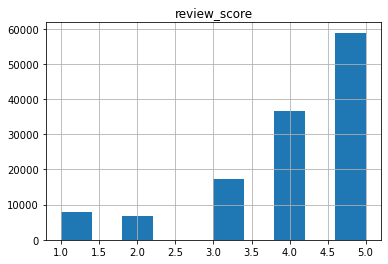

In [8]:
hotel_def.hist('review_score')

 # Q2

<AxesSubplot:>

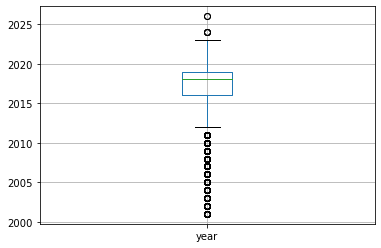

In [9]:
hotel_def.boxplot('year') 

we find that some of the data came from the future. it's very cool but we can't really on that info so we slice it from 2022(not include) and before. 

<AxesSubplot:>

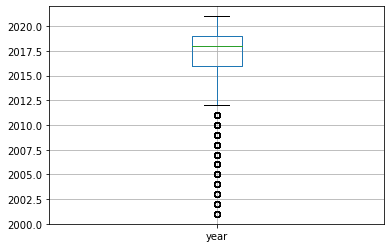

In [10]:
new_dataframe = hotel_def.loc[hotel_def.year<2022].copy()
new_dataframe.boxplot('year')  

# Q3

<AxesSubplot:ylabel='Frequency'>

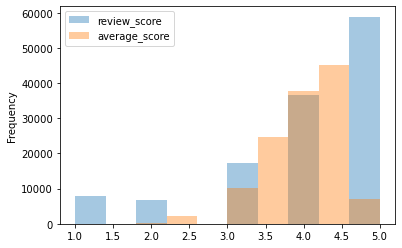

In [11]:
 new_dataframe[['review_score','average_score']].plot.hist(alpha = 0.4)

# Q4

<AxesSubplot:>

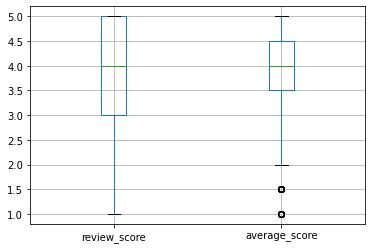

In [12]:
new_dataframe[['review_score','average_score']].boxplot()

The 'review_score' category is wider than the 'average_score' category but still had the same median. this is because they are based on the same data and the same results, just that the 'average_score' data had the average rank. 

# Q5

In [13]:
new_dataframe.groupby(['month'])[['review_score']].count().sort_values('review_score', ascending = False)

,review_score
month,
1,15311
12,12701
2,12642
3,11296
11,11093
10,10462
8,10030
7,9754
9,9486


# Q6

In [14]:
new_dataframe.groupby(['month'])[['review_score']].mean().sort_values('review_score', ascending = False)

,review_score
month,
10,4.140031
2,4.076966
9,4.066308
11,4.055531
12,4.049445
1,4.031154
3,4.020627
7,4.014046
8,4.002193


No. There is no connection between the number of reviews to the score.

# Q7

In [15]:
hotel_group = new_dataframe.groupby(['hotel_name','year'])[['review_score']].mean()
hotel_group.loc[hotel_group.review_score == 1].head(5)

review_score
hotel_name                     year              
13 Coins Airport Grand Resort  2016           1.0
                               2019           1.0
13 Coins Airport Hotel Minburi 2014           1.0
13 Coins Resort Bangna         2013           1.0
                               2015           1.0

# Q8

array([[<AxesSubplot:title={'center':'review_score'}>]], dtype=object)

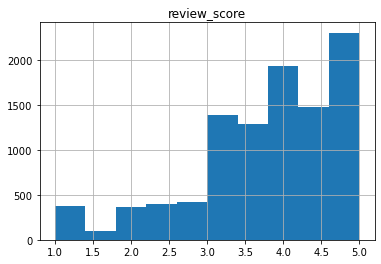

In [16]:
hotel_group.hist()

The histogram here is different because here the hotel rank is wider and the person how gave rank had more options like 4.5 3.5...

---
# GOOD LUCK !!!!
---